In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import zipfile
import os
import random

In [21]:
train_dir=r"C:\Users\dell\Downloads\brain tumour\Training"
test_dir=r"C:\Users\dell\Downloads\brain tumour\Testing"

In [22]:
train_gen=ImageDataGenerator(rescale=1./255).flow_from_directory(train_dir,target_size=(150,150),batch_size=28,class_mode='categorical')

Found 2870 images belonging to 4 classes.


In [23]:
test_gen=ImageDataGenerator(rescale=1./255).flow_from_directory(test_dir,target_size=(150,150),batch_size=28,class_mode='categorical')

Found 394 images belonging to 4 classes.


In [24]:
class_name=list(train_gen.class_indices.keys())
print(r"Classes:",class_name)

Classes: ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [28]:
model=Sequential([
    Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)),
    MaxPooling2D((2,2)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(16,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(16,activation='relu'),
    Dense(4,activation='sigmoid')
    
          
])

In [29]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [31]:
history=model.fit(train_gen,validation_data=test_gen,epochs=2,verbose=1)

Epoch 1/2
103/103 [==============================] - 168s 2s/step - loss: 0.9796 - accuracy: 0.5906 - val_loss: 1.7274 - val_accuracy: 0.3858
Epoch 2/2
103/103 [==============================] - 102s 989ms/step - loss: 0.6460 - accuracy: 0.7355 - val_loss: 1.5702 - val_accuracy: 0.4949


In [32]:
x_test,y_test=next(test_gen)
test_loss,test_acc=model.evaluate(x_test,y_test)
print(f"Predicted: {test_acc*100:.2f}%")

1/1 [==============================] - 0s 204ms/step - loss: 1.6702 - accuracy: 0.3571
Predicted: 35.71%


In [33]:
predictions=model.predict(x_test)

1/1 [==============================] - 0s 324ms/step


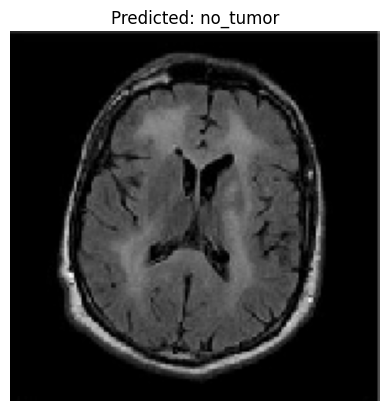

In [34]:
idx=random.randint(0,len(x_test)-1)
plt.imshow(x_test[idx],cmap='gray')
plt.title(f"Predicted: {class_name[np.argmax(predictions[idx])]}")
plt.axis('off')
plt.show()

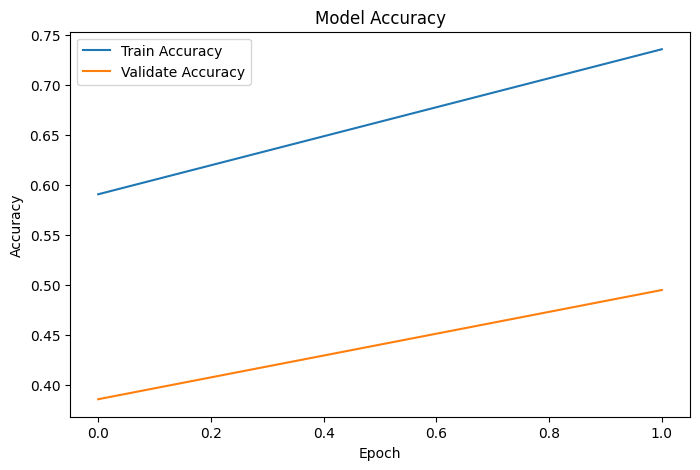

In [35]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validate Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

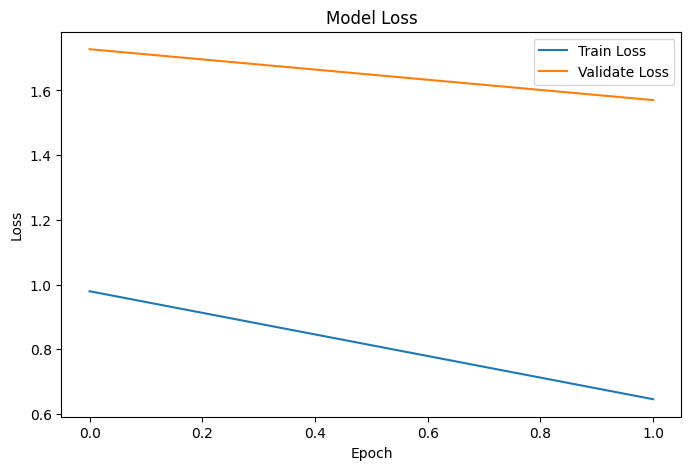

In [36]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validate Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()